<a href="https://colab.research.google.com/github/ppunkz/CE888_DS/blob/master/Lab%207/Exercise_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [0]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#**Training the model with Embedding and SimpleRNN layers**

In [0]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.models import Sequential
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6019 - acc: 0.6689 - val_loss: 0.4213 - val_acc: 0.8194
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.3752 - acc: 0.8423 - val_loss: 0.3520 - val_acc: 0.8528
Epoch 3/10
20000/20000 [==============================]

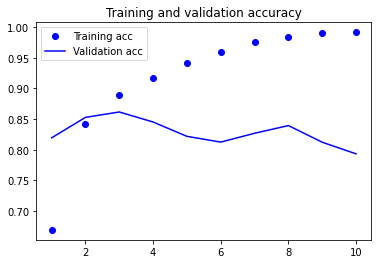

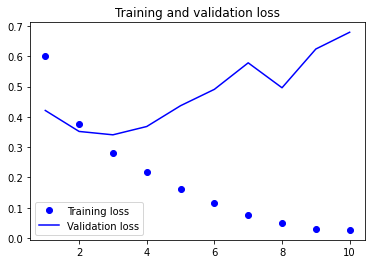

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#**Training the model with Embedding and SimpleRNN layers**

In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.4993 - acc: 0.7695 - val_loss: 0.3535 - val_acc: 0.8534
Epoch 2/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.2992 - acc: 0.8823 - val_loss: 0.3063 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.2349 - acc: 0.9118 - val_loss: 0.3126 - val_acc: 0.8634
Epoch 4/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2007 - acc: 0.9270 - val_loss: 0.2967 - val_acc: 0.8836
Epoch 5/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.1740 - acc: 0.9375 - val_loss: 0.3898 - val_acc: 0.8656
Epoch 6/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.1549 - acc: 0.9447 - val_loss: 0.4188 - val_acc: 0.8784
Epoch 7/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1449 - acc: 0.9474 - val_loss: 0.3227 - val_acc:

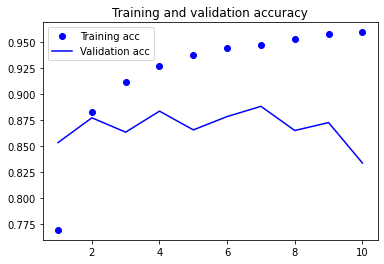

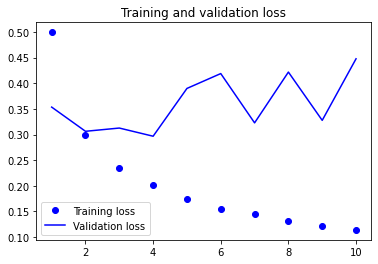

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()